In [1]:
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
df=pd.read_csv('top_bottom_ids_labeled_3000.txt', sep=" ", names=["tid","bid","label"])


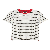

In [3]:
Image.open("/shopback_mnt/xiaoming_dataset/4100207").convert("RGB").resize([50,50])

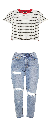

In [4]:
def merge_tb(tid, bid):
    timg_size=[50,50]
    bimg_size=[50,70]
    timg=np.asarray(Image.open("/shopback_mnt/xiaoming_dataset/"+str(tid)).convert("RGB").resize(timg_size))
    bimg=np.asarray(Image.open("/shopback_mnt/xiaoming_dataset/"+str(bid)).convert("RGB").resize(bimg_size))
    tbimg = np.concatenate([timg,bimg], axis=0)
    return tbimg

res= merge_tb(4100207, 4102990)
res.shape

Image.fromarray(res)

In [5]:
x=[]
y=[]
for index, row in df.iterrows():
    try:
        tmp = merge_tb(row['tid'],row['bid'])
    except:
        continue
    x.append(tmp)
    y.append(row['label'])
x=np.array(x)
y=np.array(y)
print(x.shape, y.shape)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(5992, 120, 50, 3) (5992,)


In [6]:
print(x.shape, y.shape)

(5992, 120, 50, 3) (5992,)


In [7]:
import pickle
with open('xiaoming_dataset_xy_120.pickle', 'wb') as handle:
    pickle.dump((x,y), handle, protocol=pickle.HIGHEST_PROTOCOL)